In [8]:
import numpy as np
import pandas as pd
import os

In [9]:
titanic_train=pd.read_csv("/Users/ASUS/Documents/GitHub/IntroductionToMachineLearning/Week03/train.csv")

In [10]:
titanic_train.shape

(891, 12)

In [43]:
titanic_train.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S
5,6,0,Class3,"Moran, Mr. James",male,25.0,0,0,8.4583,n,Q
6,7,0,Class1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E,S
7,8,0,Class3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,n,S
8,9,1,Class3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,n,S
9,10,1,Class2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,n,C


In [46]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index 
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Embarked'], dtype='object')


,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Braund, Mr. Owen Harris",male,S
freq,1,577,644


In [61]:
titanic_train["Name"][0:22]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [23]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [63]:
del titanic_train["Sex"]

In [28]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],
                            ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2", "Class3"])

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [29]:
titanic_train["Pclass"] = new_Pclass

In [64]:
titanic_train["Cabin"].unique()

['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'n']

In [66]:
titanic_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [32]:
char_cabin = titanic_train["Cabin"].astype(str) 

new_Cabin = np.array([cabin[0] for cabin in char_cabin])

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [33]:
titanic_train["Cabin"] = new_Cabin

In [34]:
dummy_vector = pd.Series([1,None,3,None,5,9])

dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [35]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
missing = np.where(titanic_train["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [38]:
len(missing[0])

177

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

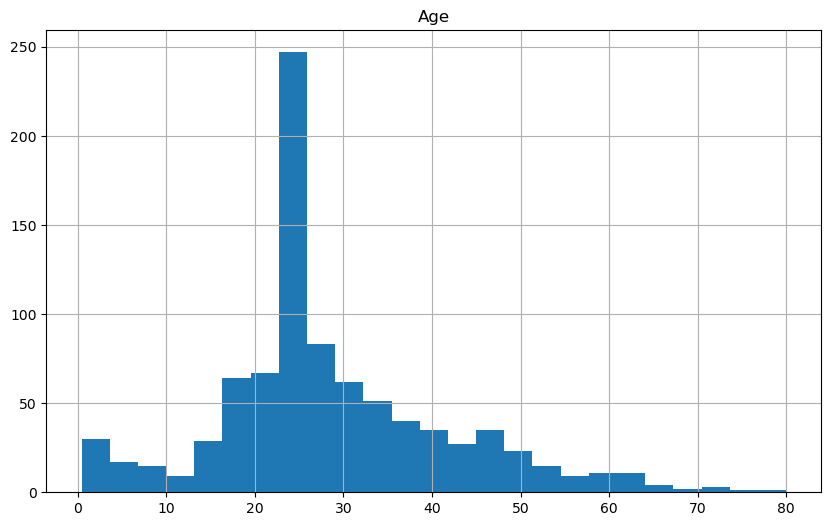

In [81]:
titanic_train.hist(column='Age',
                  figsize=(10,6),
                  bins=25)

In [85]:
new_age_var = np.where(titanic_train["Age"].isnull(),
                      250,
                      titanic_train["Age"])

titanic_train["Age"] = new_age_var

titanic_train["Age"].describe()

count    891.000000
mean      28.765623
std       13.136649
min        0.420000
25%       22.000000
50%       25.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

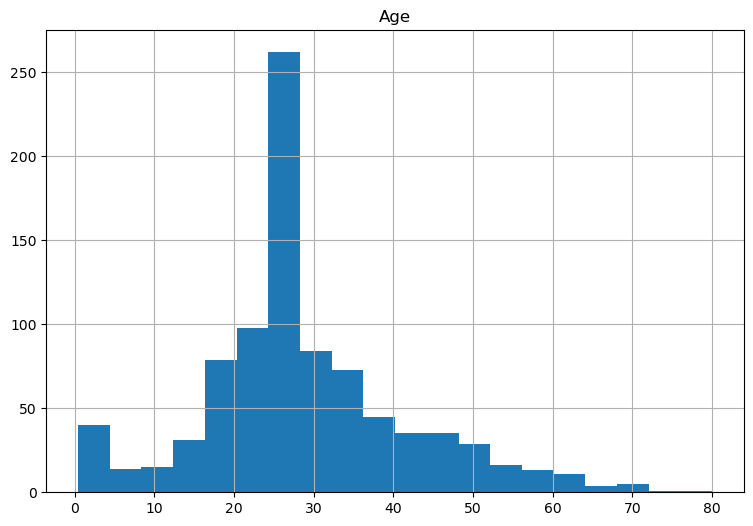

In [42]:
titanic_train.hist(column='Age',
                  figsize=(9,6),
                  bins=20)